In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import json

from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip './drive/MyDrive/Data/archive.zip'

In [ ]:
import os
import shutil
import random

def sample_data(src_dir, dest_dir, sample_fraction=0.5):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    labels = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

    for label in labels:
        label_src_dir = os.path.join(src_dir, label)
        label_dest_dir = os.path.join(dest_dir, label)

        if not os.path.exists(label_dest_dir):
            os.makedirs(label_dest_dir)

        files = os.listdir(label_src_dir)
        sample_size = int(len(files) * sample_fraction)
        sampled_files = random.sample(files, sample_size)

        for file_name in sampled_files:
            src_file_path = os.path.join(label_src_dir, file_name)
            dest_file_path = os.path.join(label_dest_dir, file_name)
            shutil.copy(src_file_path, dest_file_path)
        print(f"Copied {sample_size} files from {label_src_dir} to {label_dest_dir}")

# Source directory containing the dataset
source_directory = './dataset'
# Destination directory to store the sampled data
destination_directory = './sampled_dataset'

# Sample 50% of the data
sample_data(source_directory, destination_directory, sample_fraction=0.05)


In [ ]:
# use https://huggingface.co/docs/datasets/image_load for reference

# Import necessary libraries
image_dict = {}

# Define the list of file names
from pathlib import Path
from tqdm import tqdm
import os
# Initialize empty lists to store file names and labels
file_names = []
labels = []
# Iterate through all image files in the specified directory
for file in sorted((Path('./sampled_dataset').glob('*/*.*'))):
    # check number of such files in a directory
    sample_dir = '/'.join(str(file).split('/')[:-1])+'/'
    file_names.append(str(file))  # Add the file path to the list
    label = str(file).split('/')[-2]  # Extract the label from the file path
    labels.append(label)  # Add the label to the list

# Print the total number of file names and labels
print(len(file_names), len(labels), len(set(labels)))

# Create a pandas dataframe from the collected file names and labels
df = pd.DataFrame.from_dict({"image": file_names, "label": labels})


3822 3822 100


In [ ]:
import os

# Specify the directory
data_dir = './sampled_dataset'

# List all directories (labels)
labels = os.listdir(data_dir)

# Initialize a dictionary to store image paths
image_paths = {}

# Loop through each label and list images
for label in labels:
    label_dir = os.path.join(data_dir, label)
    images = os.listdir(label_dir)
    image_paths[label] = [os.path.join(label_dir, img) for img in images]

# Print some image paths for each label
for label, paths in image_paths.items():
    print(f"Label: {label}")
    print(paths[:5])  # Print first 5 image paths for each label


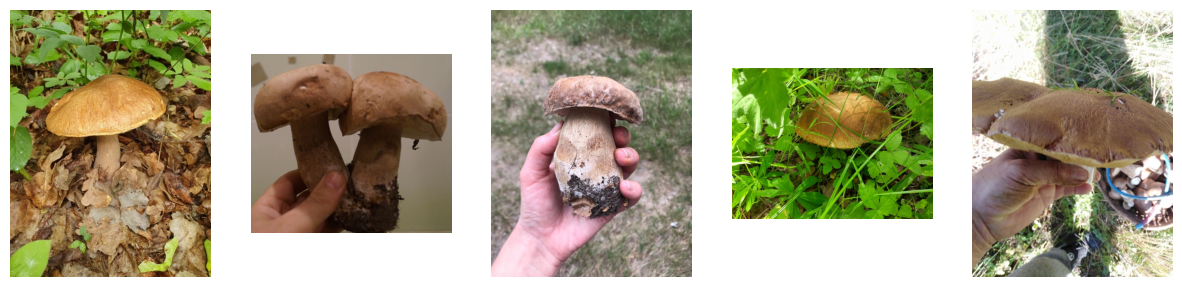

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def view_images(image_paths, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for ax, img_path in zip(axes, image_paths[:num_images]):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# View images from a specific label
label_to_view = labels[0]  # Change this to any label you want to view
view_images(image_paths[label_to_view])


In [ ]:
os.listdir('dataset')

['Evernia mesomorpha',
 'Macrolepiota procera',
 'Inonotus obliquus',
 'Trametes hirsuta',
 'Phlebia radiata',
 'Flammulina velutipes',
 'Amanita rubescens',
 'Laetiporus sulphureus',
 'Parmelia sulcata',
 'Urnula craterium',
 'Platismatia glauca',
 'Artomyces pyxidatus',
 'Sarcoscypha austriaca',
 'Suillus granulatus',
 'Armillaria borealis',
 'Coprinopsis atramentaria',
 'Lepista nuda',
 'Verpa bohemica',
 'Lactarius deliciosus',
 'Chlorociboria aeruginascens',
 'Paxillus involutus',
 'Calocera viscosa',
 'Trichaptum biforme',
 'Clitocybe nebularis',
 'Fomes fomentarius',
 'Gyromitra esculenta',
 'Coltricia perennis',
 'Boletus reticulatus',
 'Sarcosoma globosum',
 'Sarcomyxa serotina',
 'Tremella mesenterica',
 'Cantharellus cibarius',
 'Crucibulum laeve',
 'Phallus impudicus',
 'Phaeophyscia orbicularis',
 'Fomitopsis pinicola',
 'Cladonia stellaris',
 'Vulpicida pinastri',
 'Merulius tremellosus',
 'Panellus stipticus',
 'Coprinus comatus',
 'Leccinum scabrum',
 'Tricholomopsis ru

In [ ]:
import os
from rembg import remove
from PIL import Image

def remove_background_from_image(input_path, output_path):
    with open(input_path, 'rb') as input_file:
        input_image = input_file.read()
        output_image = remove(input_image)

    with open(output_path, 'wb') as output_file:
        output_file.write(output_image)

def process_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)

                output_dir_path = os.path.dirname(output_path)
                if not os.path.exists(output_dir_path):
                    os.makedirs(output_dir_path)

                try:
                    remove_background_from_image(input_path, output_path)
                    print(f'Successfully processed: {input_path}')
                except Exception as e:
                    print(f'Error processing {input_path}: {e}')

input_dir = './dataset/'
output_dir = './drive/MyDrive/Data/dataset_removed_bg'
process_images(input_dir, output_dir)


In [ ]:
import os
!pip install rembg
from rembg import remove
from PIL import Image

def remove_background_from_image(input_path, output_path):
    with open(input_path, 'rb') as input_file:
        input_image = input_file.read()
        output_image = remove(input_image)

    with open(output_path, 'wb') as output_file:
        output_file.write(output_image)

def process_images(input_dir, output_dir, image_dirs):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for dir_name in image_dirs:
        dir_path = os.path.join(input_dir, dir_name)
        if os.path.exists(dir_path):
            for root, _, files in os.walk(dir_path):
                for file in files:
                    if file.lower().endswith(('png', 'jpg', 'jpeg')):
                        input_path = os.path.join(root, file)
                        relative_path = os.path.relpath(input_path, input_dir)
                        output_path = os.path.join(output_dir, relative_path)

                        output_dir_path = os.path.dirname(output_path)
                        if not os.path.exists(output_dir_path):
                            os.makedirs(output_dir_path)

                        try:
                            remove_background_from_image(input_path, output_path)
                            print(f'Successfully processed: {input_path}')
                        except Exception as e:
                            print(f'Error processing {input_path}: {e}')
        else:
            print(f'Directory does not exist: {dir_path}')

input_dir = './dataset/'
output_dir = './drive/MyDrive/Data/dataset_removed_bg'
image_dirs = ['Evernia mesomorpha',
 'Macrolepiota procera',
 'Inonotus obliquus']

process_images(input_dir, output_dir, image_dirs)


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 105GB/s]


Successfully processed: ./dataset/Evernia mesomorpha/9148medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9357medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9123medium.jpeg
Successfully processed: ./dataset/Evernia mesomorpha/9336medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9701medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9707medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9188medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9224medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9308medium.jpeg
Successfully processed: ./dataset/Evernia mesomorpha/9421medium.jpeg
Successfully processed: ./dataset/Evernia mesomorpha/9134medium.jpeg
Successfully processed: ./dataset/Evernia mesomorpha/9634medium.jpg
Successfully processed: ./dataset/Evernia mesomorpha/9695medium.jpeg
Successfully processed: ./dataset/Evernia mesomorpha/9566medium.jpg
Successfully processed: ./dataset/Evernia m

KeyboardInterrupt: 